<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#Bar-Plot" data-toc-modified-id="Bar-Plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bar Plot</a></span></li><li><span><a href="#Combined" data-toc-modified-id="Combined-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Combined</a></span></li><li><span><a href="#Individual-Exind" data-toc-modified-id="Individual-Exind-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Individual Exind</a></span></li></ul></div>

# Preamble

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import glob
import pickle

In [125]:
path_2 = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/MJO/MJO_df.pickle'
pickle_in_2 = open(path_2, 'rb')
MJO_df = pickle.load(pickle_in_2)

In [131]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/MJO/MJO_ENSO_exinds_2.pickle'
pickle_in = open(path, 'rb')
MJO_ENSO_exinds = pickle.load(pickle_in)

In [132]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/MJO/MJO_ENSO_normal.pickle'
pickle_in = open(path, 'rb')
MJO_ENSO_normal = pickle.load(pickle_in)

# Bar Plot

In [48]:
def sub_bar_plot(data,ax1, plot_num, title):
    #Adding in a subplot




    #Finding the mean of each column
    average_of_phases = data.mean(axis = 1)


    #Find the Percent for Each Phase
    total_of_phase = np.array(average_of_phases.iloc[:].sum())
    prob_in_phase = average_of_phases / total_of_phase * 100




    #Plotting 
    ax2 = ax1.twinx()
    ax1.bar(average_of_phases.index, average_of_phases.iloc[:])
    ax2.bar(average_of_phases.index,prob_in_phase)


    #Y-lables



    ax1.set_ylabel(ex_type, size = font_size)


    if ex_type == ex_list[0]:
        ax2.set_ylabel('Probability of Occurence (%)', size = font_size)
    else:
        ax2.set_ylabel('Percent in Phase', size = font_size)

    #Adding in the plot title
    plt.title(title, size = font_size + 5)
        

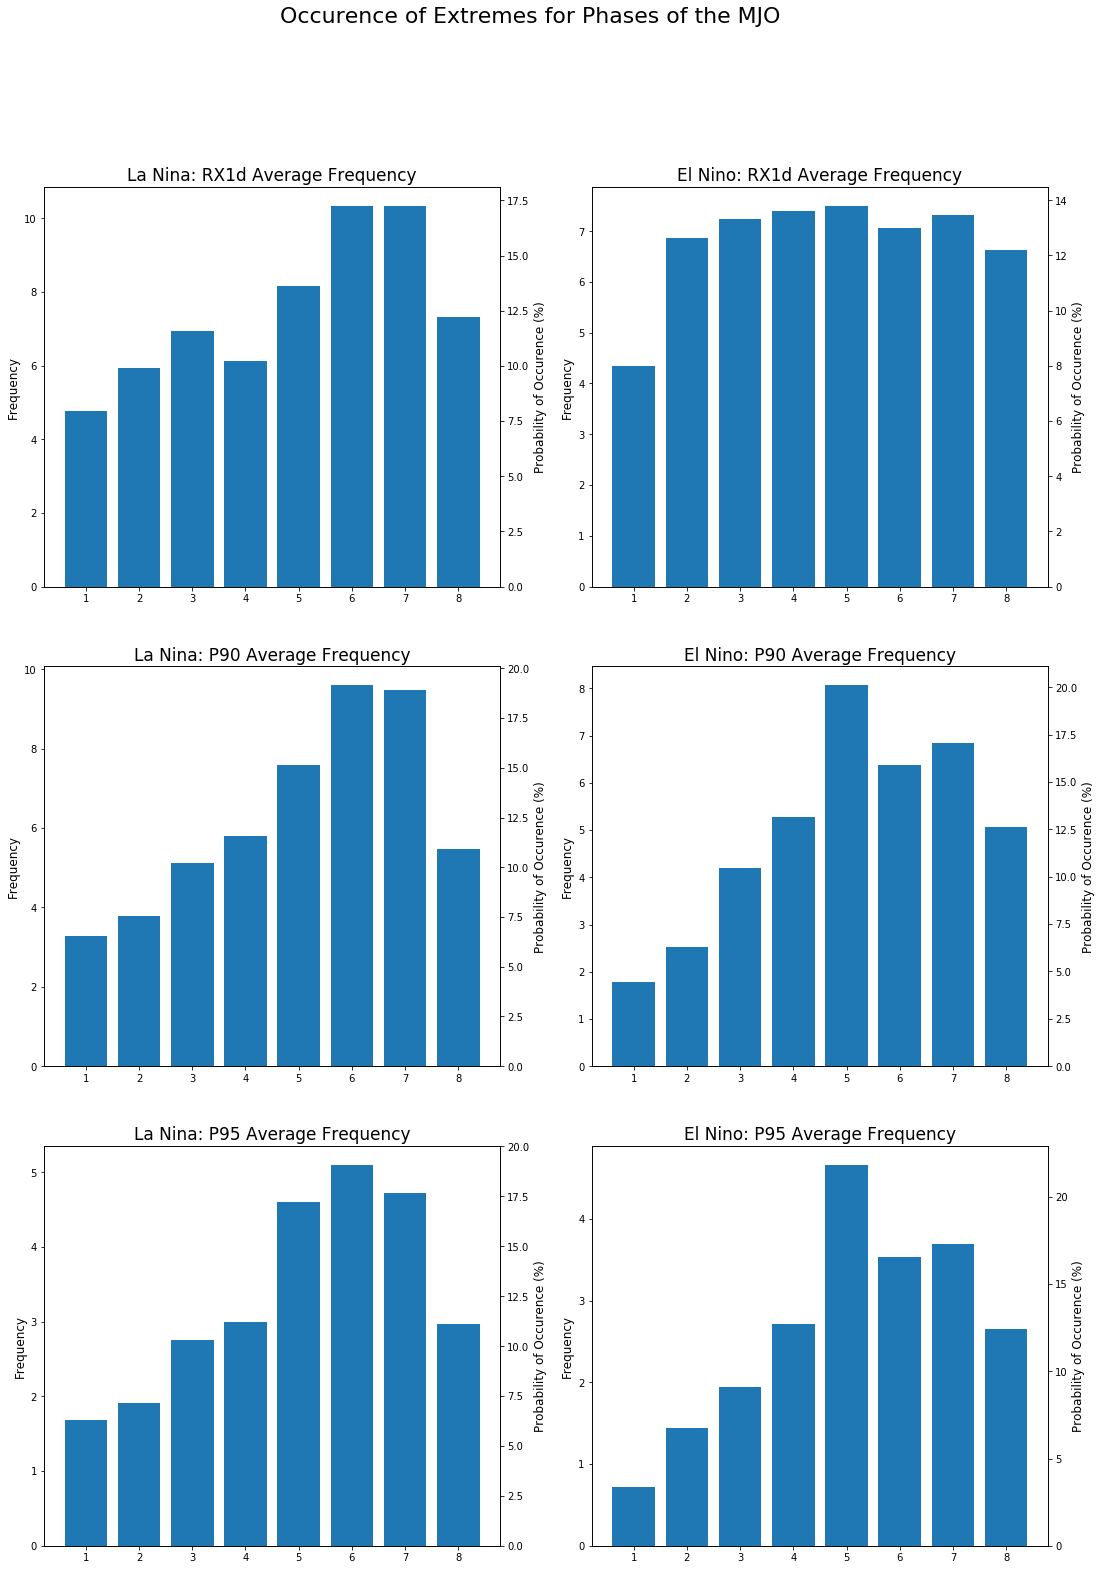

In [49]:
index_list = list(MJO_ENSO_exinds.keys())
ex_list = ['Frequency','Intensity (mm)']
ex_type = ex_list[0]

#All fonts are adjusted from this
font_size = 12

#Dimensins of the plots
rows = len(index_list)
cols = 2

fig = plt.figure(figsize = (18,25))
plt.suptitle('Occurence of Extremes for Phases of the MJO', size  = font_size + 10)

#This is the number of the plot in the subplots
plot_num = 1

for index in index_list: #Looping thought the rows

    #Plot 1        
    ax1 = fig.add_subplot(rows,cols,plot_num)

    data = MJO_ENSO_exinds[index][ex_type]['La Nina']
    title = 'La Nina: ' + index + ' Average ' + ex_type
    sub_bar_plot(data,ax1, plot_num, title)

    plot_num += 1
    
    
    
    #Plot 2
    ax1 = fig.add_subplot(rows,cols,plot_num)

    data = MJO_ENSO_exinds[index][ex_type]['El Nino']
    title = 'El Nino: ' + index + ' Average ' + ex_type
    sub_bar_plot(data,ax1, plot_num, title)

    plot_num += 1


# fig.savefig('Occurence of Extremes for Phases of the MJO.png', bbox_inches = 'tight')

# Combined 

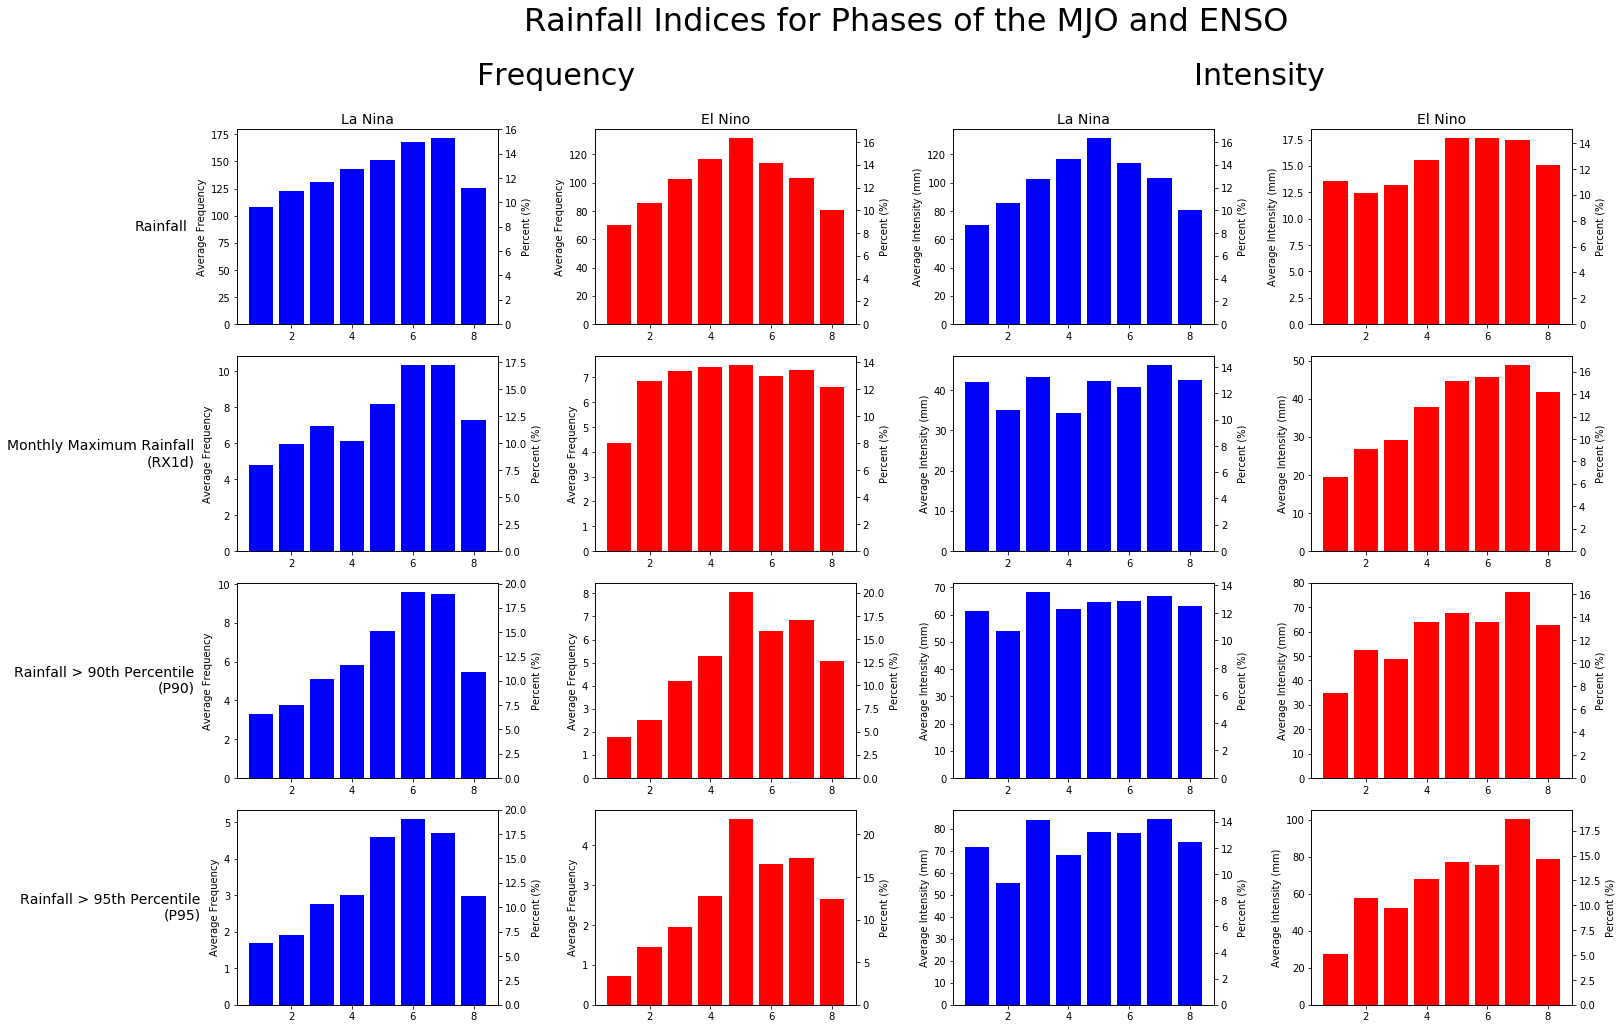

In [88]:
index_list = ['', 'RX1d','P90','P95']
index_names = ['Rainfall','Monthly Maximum Rainfall', 'Rainfall > 90th Percentile', 'Rainfall > 95th Percentile']

index_zip = list(zip(index_list , index_names))

ex_list = ['Frequency','Intensity (mm)']
ENSO_phases = ['La Nina', 'El Nino']

#All fonts are adjusted from this
font_size = 12
row_col_size = font_size + 15

#Number of rows and columsn
ncols = 4
nrows= len(index_list)



fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

title = 'Rainfall Indices for Phases of the MJO and ENSO'

plt.suptitle(title, size  = font_size + 20)



#This is so in order to get the correct title from index names list for each plot
row_num = 0


# This is to make sure that the other dict for normal rainfall gets plotted first
plot_num = 1

for row_num, index in enumerate(index_list): #Looping thought the rows
    
    col_num = 0 #Two for loops, thus col_num must be controlled manually
    for ex_type in ex_list:
        
        for ENSO in ENSO_phases:
        

            '''Determining which data to use'''
            if row_num  == 0:
                if col_num == 0 or col_num == 1:
                    data = MJO_ENSO_normal['Frequency'][ENSO]
                elif plot_num  == 2 or col_num == 3:
                    data = MJO_ENSO_normal['Intensity (mm)'][ENSO]
            else:
                data = MJO_ENSO_exinds[index][ex_type][ENSO]


            '''Calculations using the data'''
            #Finding the mean of each column
            average_of_phases = data.mean(axis = 1)


            #Find the Percent for Each Phase
            total_of_phase = np.array(average_of_phases.iloc[:].sum())
            prob_in_phase = average_of_phases / total_of_phase * 100




            ''' Plotting'''
            if ENSO == 'El Nino':
                c= 'r'
            else:
                c = 'b'
            
            ax1 = axes[row_num, col_num]
            ax2 = ax1.twinx()
            ax1.bar(average_of_phases.index, average_of_phases.iloc[:], color= c)
            ax2.bar(average_of_phases.index,prob_in_phase, color=c)


            #Y labels 
            if col_num == 0 or col_num == 1:
                ax1.set_ylabel('Average Frequency', size = 10)
            elif col_num == 2 or col_num == 3:
                ax1.set_ylabel('Average Intensity (mm)', size = 10)

            ax2.set_ylabel('Percent (%)', size = 10)
            
            
            #Moving on to the next Columns
            col_num += 1
            
            
            

'''Row and Columns Titles'''
#Source of Code
# https://stackoverflow.com/questions/25812255/row-and-column-headers-in-matplotlibs-subplots


#Annotate Documenation
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html

size = 14
pad = 5

rows = index_zip

for ax, row in zip(axes[:,0], rows):
    if row[1] == 'Rainfall': 
        ax.annotate(row[1], xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size=size, ha='right', va='center')
    else:
        ax.annotate(row[1] + '\n'+ '('+row[0] +')', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
            xycoords=ax.yaxis.label, textcoords='offset points',
            size=size, ha='right', va='center')

    
cols = ENSO_phases * 2
    
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')

    
#Source:
# https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle

fig.tight_layout(rect=[0, 0.03, 1, 0.88])


# fig.savefig(title + '.png', bbox_inches = 'tight')

ax.annotate('Frequency', xy=(-2.9, 1.2), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=30, ha='center', va='baseline');

ax.annotate('Intensity', xy=(-0.2, 1.2), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=30, ha='center', va='baseline');

#  Individual Exind

In [169]:
 
def MJO_ENSO_bar_plot(ex_type, save_fig = 0): 
    index_list = ['', 'RX1d','P90','P95','P99']
    index_names = ['Rainfall','Monthly Maximum Rainfall', 
                   'Rainfall > 90th Percentile', 'Rainfall > 95th Percentile','Rainfall > 99th Percentile']

    index_zip = list(zip(index_list , index_names))

    ENSO_phases = ['La Nina', 'El Nino']

    #All fonts are adjusted from this
    font_size = 12
    row_col_size = font_size + 15

    #Number of rows and columsn
    ncols = 2
    nrows= len(index_list)



    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 15))

    title = 'Rainfall ' + ex_type + ' for Phases of the MJO and ENSO'

    plt.suptitle(title, size  = font_size + 10)



    #This is so in order to get the correct title from index names list for each plot
    row_num = 0


    # This is to make sure that the other dict for normal rainfall gets plotted first
    plot_num = 1

    for row_num, index in enumerate(index_list): #Looping thought the rows

        col_num = 0 #Two for loops, thus col_num must be controlled manually


        for ENSO in ENSO_phases:


            '''Determining which data to use'''
            if row_num  == 0:
                if col_num == 0 or col_num == 1:
                    data = MJO_ENSO_normal['Frequency'][ENSO]
                elif plot_num  == 2 or col_num == 3:
                    data = MJO_ENSO_normal['Intensity (mm)'][ENSO]
            else:
                data = MJO_ENSO_exinds[index][ex_type][ENSO]


            '''Calculations using the data'''
            #Finding the mean of each column
            average_of_phases = data.mean(axis = 1)


            #Find the Percent for Each Phase
            total_of_phase = np.array(average_of_phases.iloc[:].sum())
            prob_in_phase = average_of_phases / total_of_phase * 100

            '''Plotting'''

            ax1 = axes[row_num, col_num]
            ax2 = ax1.twinx()
            ax1.bar(average_of_phases.index, average_of_phases.iloc[:])
            ax2.bar(average_of_phases.index,prob_in_phase)
            
            
            
            '''Y Limits'''
            #The upper limit on the y2 axis
            if ex_type == 'Frequency':
                percent_max = 25
            else:
                percent_max = 30
        
   
            y2_min, y2_max = ax2.get_ylim()

            delta_y = percent_max /y2_max #This is the amount the the y2 axis has been multiplided by in order to get
            #to percent_max


            y1_min, y1_max = ax1.get_ylim() #The current limits on the axis

            y1_max_new = y1_max * delta_y #The new limits on the axis, after it has been stretched by the same
            #amount


            ax1.set_ylim(0,y1_max_new)
            ax2.set_ylim(0,percent_max)
        
        
        
        
            '''Y labels'''
            if ex_type == 'Frequency':
                ax1.set_ylabel('Average Frequency', size = 10)
            else:
                ax1.set_ylabel('Average Intensity (mm)', size = 10)

            ax2.set_ylabel('Percent (%)', size = 10)
#             ax2.set_ylim(0,20)z



            #Moving on to the next Columns
            col_num += 1




    '''Row and Columns Titles'''
    #Source of Code
    # https://stackoverflow.com/questions/25812255/row-and-column-headers-in-matplotlibs-subplots


    #Annotate Documenation
    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html

    size = 14
    pad = 5

    rows = index_zip

    for ax, row in zip(axes[:,0], rows):
        if row[1] == 'Rainfall': 
            ax.annotate(row[1], xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                        xycoords=ax.yaxis.label, textcoords='offset points',
                        size=size, ha='right', va='center')
        else:
            ax.annotate(row[1] + '\n'+ '('+row[0] +')', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=size, ha='right', va='center')


    cols = ENSO_phases * 2

    for ax, col in zip(axes[0], cols):
        ax.annotate(col , xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size=size + 5, ha='center', va='baseline')


    #Source:
    # https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle

    fig.tight_layout(rect=[0, 0.03, 1, 0.92])

    if save_fig:
        fig.savefig(title + '.png', bbox_inches = 'tight')


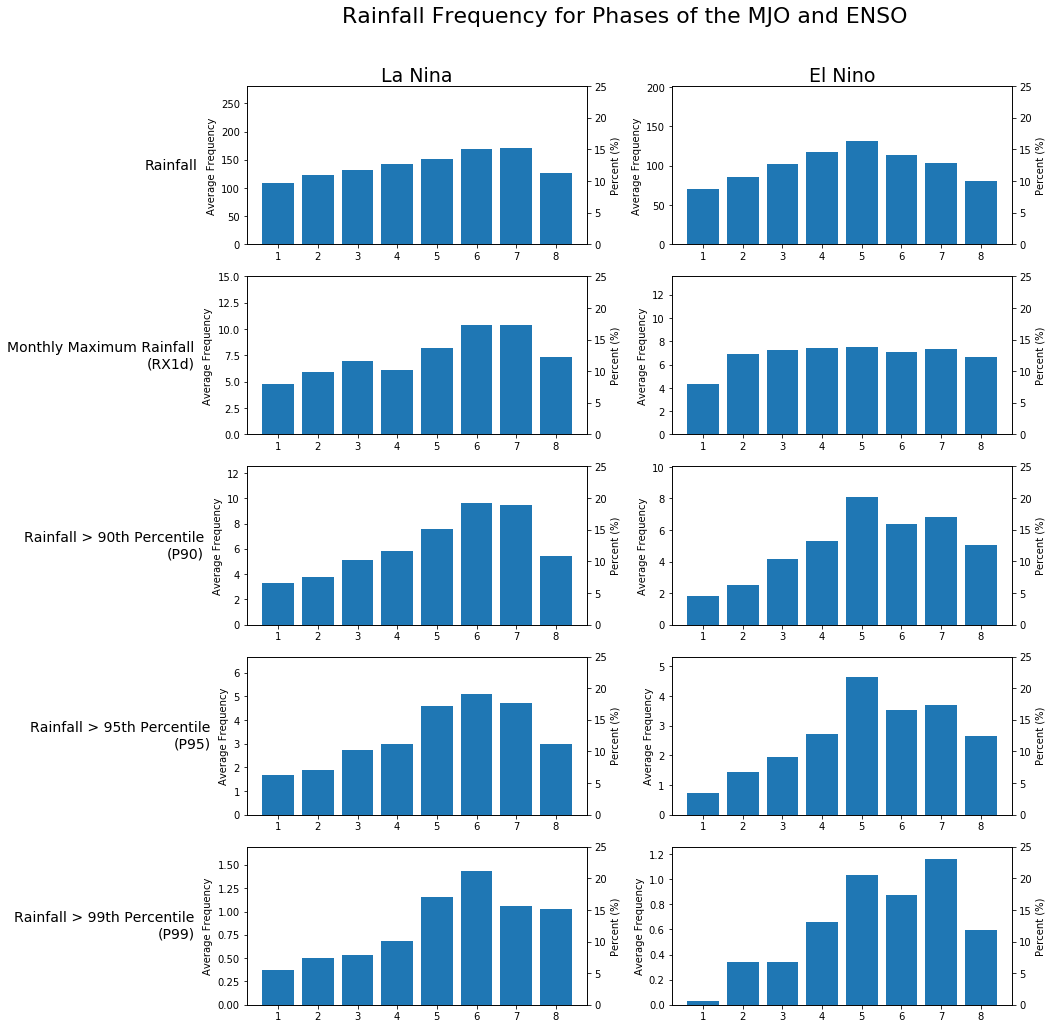

In [170]:

ex_list = ['Frequency','Intensity (mm)']
ex_type = ex_list[0]

MJO_ENSO_bar_plot(ex_type, save_fig = 1)

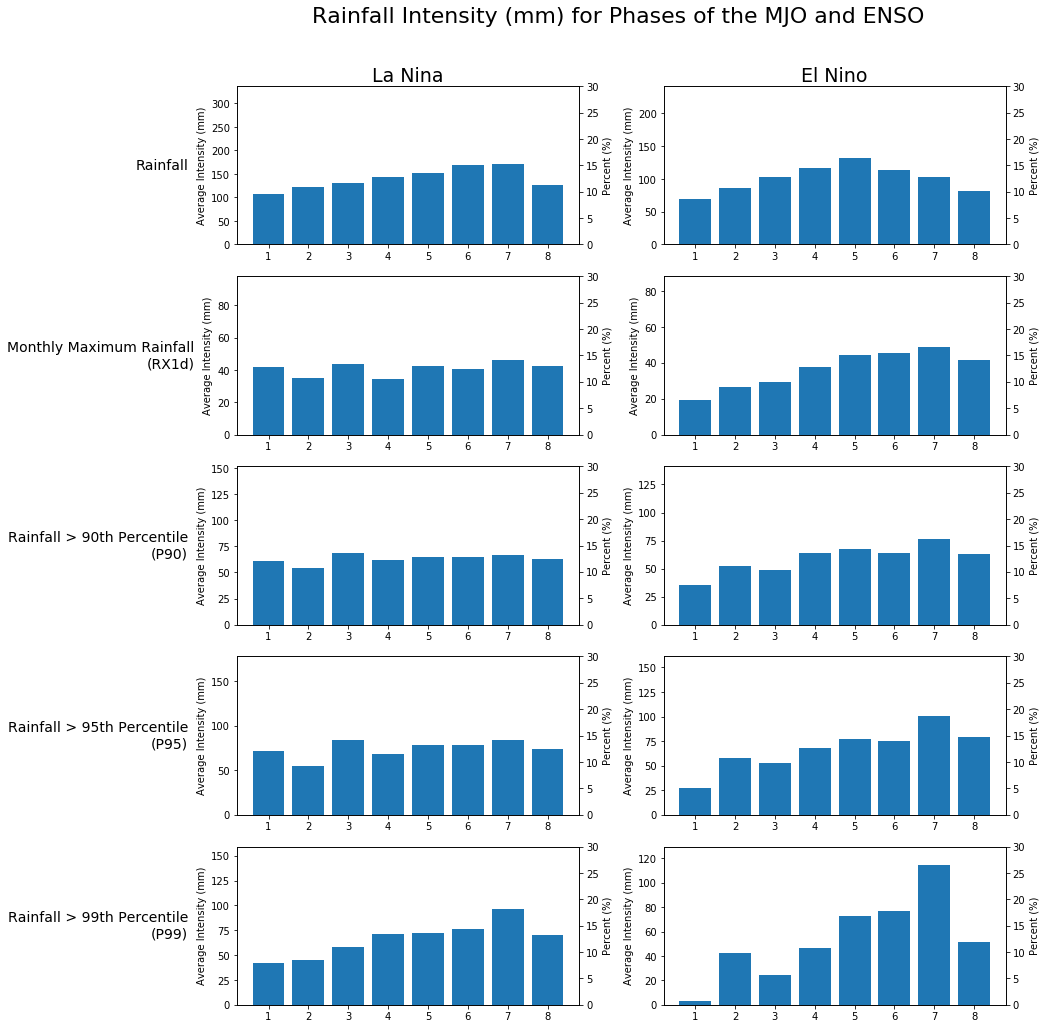

In [171]:

ex_list = ['Frequency','Intensity (mm)']
ex_type = ex_list[1]

MJO_ENSO_bar_plot(ex_type, save_fig = 1)